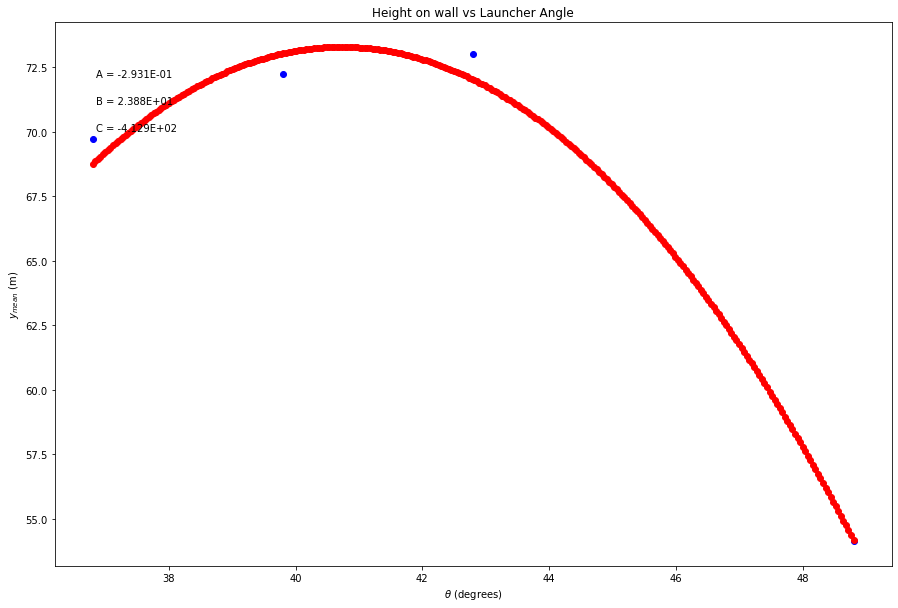

C =  -412.9128276749435 B =  23.875603856943986 A =  -0.29311529648602896


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


%matplotlib inline

sample_size_value = math.sqrt(10)
#Create arrays for your data

# data point at 39.8 degrees removed as it was a major outlier
theta_array = np.array([48.8,42.8,39.8,36.8])
ymean_array = np.array([i+50 for i in [4.14,23, 22.24, 19.7]])

#Create an array for your y-axis uncertainties
yerr_array = []
yerr_array.append(np.std([i+50/sample_size_value for i in [2.2,2.9,3.0,5.3,7.3]]))
yerr_array.append(np.std([i+50/sample_size_value for i in [21.8,22.2,22.9,23.8,24.3]]))
yerr_array.append(np.std([i+50/sample_size_value for i in [21.1,21.6,21.1,23.6,23.8]]))
yerr_array.append(np.std([i+50/sample_size_value for i in [18.5,19.7,20.3,19.6,20.4]]))
yerr_array = np.array(yerr_array)
#Reassign variables
x = theta_array
y = ymean_array
dy = yerr_array

#size the plot
plt.figure(figsize=(15,10))

#create scatter plot
plt.scatter(x, y, color='blue', marker='o')

#create labels
plt.xlabel('$\\theta$ (degrees)')
plt.ylabel('$y_{mean}$ (m)')
plt.title('Height on wall vs Launcher Angle')

#fitting to a 2nd degree polynomial
c,b,a=np.polynomial.polynomial.polyfit(x,y,2,w=dy)

#Annotate with values of A, B, C from best fit polynomial
plt.annotate('A = {value:.{digits}E}'.format(value=a, digits=3),
             (0.05, 0.9), xycoords='axes fraction')

plt.annotate('B = {value:.{digits}E}'.format(value=b, digits=3),
             (0.05, 0.85), xycoords='axes fraction')
             
plt.annotate('C = {value:.{digits}E}'.format(value=c, digits=3),
             (0.05, 0.8), xycoords='axes fraction')
#Create fit line
xnew = np.linspace(x.min(), x.max(), 300)
fit = a*xnew**2 + b*xnew +c

plt.scatter(xnew, fit, color='red')
plt.show()

print ("C = ",c , "B = ",b, "A = ",a)